# Статистика в PyTorch

In [1]:
import torch
from torch.distributions.bernoulli import Bernoulli
from torch.distributions.binomial import Binomial
from torch.distributions.poisson import Poisson
from torch.distributions.uniform import Uniform
from torch.distributions.normal import Normal
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import warnings
warnings.filterwarnings('ignore')


## Немного о тензорах в PyTorch

In [44]:
# set tensor
#scalar, vector, matrix, tensor
tensor = torch.tensor([[7., 7.], [4.,5.],[6.,8.]],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               ) 
tensor

tensor([[7., 7.],
        [4., 5.],
        [6., 8.]])

In [17]:
# Check the number of dimensions of tensor
tensor.ndim

2

In [18]:
# Check shape of tensor
tensor.shape

torch.Size([3, 2])

In [19]:
# device tensor is stored on
tensor.device

device(type='cpu')

In [46]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [47]:
scalar.ndim

0

In [49]:
scalar.shape

torch.Size([])

In [50]:
# Get the Python number within a tensor (only works with one-element tensors)
scalar.item()

7

## Случайный тензор

In [51]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.6039, 0.3446, 0.1899, 0.2885],
         [0.6354, 0.5291, 0.6589, 0.2615],
         [0.3948, 0.1543, 0.5535, 0.9079]]),
 torch.float32)

## Распределение Бернулли

In [2]:
bernoulli_example = Bernoulli(torch.tensor([0.3]))
bernoulli_example.sample_n(25) 

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.]])

In [12]:
# Check the number of dimensions of tensor
print(bernoulli_example.sample_n(25).ndim)

# Check shape of tensor
print(bernoulli_example.sample_n(25).shape)

2
torch.Size([25, 1])


In [3]:
bernoulli_example.variance

tensor([0.2100])

In [4]:
bernoulli_example.mean

tensor([0.3000])

In [5]:
bernoulli_example.sample(sample_shape=torch.Size([3,5]))

tensor([[[0.],
         [0.],
         [1.],
         [0.],
         [1.]],

        [[1.],
         [0.],
         [1.],
         [0.],
         [0.]],

        [[0.],
         [1.],
         [0.],
         [0.],
         [0.]]])

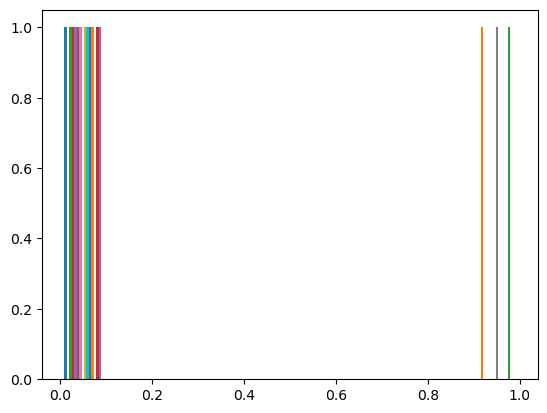

In [6]:
bernoulli_example_samples = bernoulli_example.sample_n(15)
plt.hist(bernoulli_example_samples);

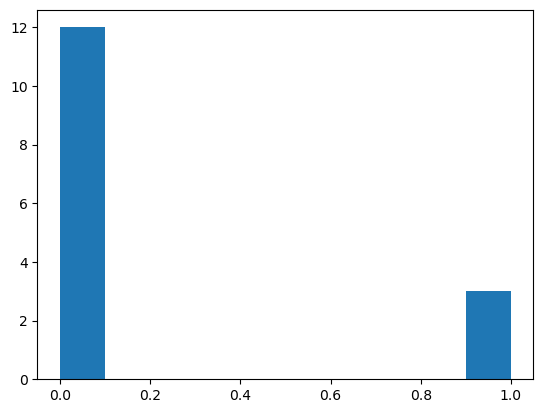

In [7]:
plt.hist(bernoulli_example_samples.numpy());

## Биномиальное распределение

In [8]:
BN = Binomial(torch.tensor([20]), torch.tensor([0.4])).sample_n(25) 
BN

tensor([[ 3.],
        [ 7.],
        [ 8.],
        [ 4.],
        [ 7.],
        [10.],
        [ 5.],
        [ 5.],
        [ 9.],
        [ 8.],
        [ 6.],
        [ 9.],
        [ 7.],
        [11.],
        [ 7.],
        [10.],
        [ 8.],
        [ 9.],
        [ 9.],
        [ 8.],
        [11.],
        [ 9.],
        [ 7.],
        [ 8.],
        [ 6.]])

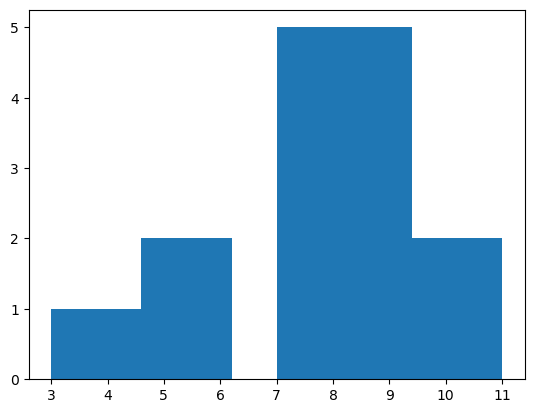

In [9]:
plt.hist(BN.numpy());

## Распределение Пуассона

In [10]:
P = Poisson(torch.tensor([3.])).sample_n(25)
P

tensor([[2.],
        [3.],
        [6.],
        [5.],
        [1.],
        [4.],
        [3.],
        [3.],
        [1.],
        [1.],
        [6.],
        [2.],
        [6.],
        [3.],
        [9.],
        [3.],
        [2.],
        [4.],
        [3.],
        [7.],
        [4.],
        [8.],
        [0.],
        [2.],
        [6.]])

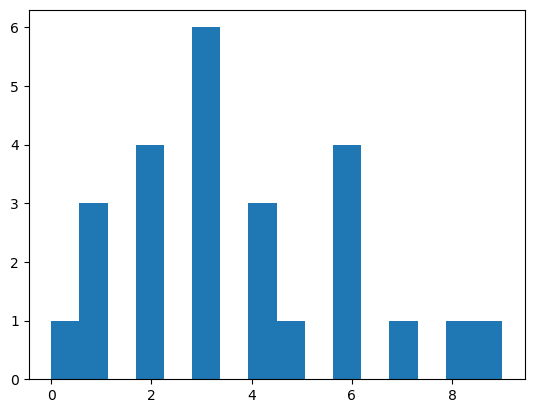

In [11]:
plt.hist(P.numpy(), bins=16);

## Равномерное распределение

In [12]:
U = Uniform(torch.tensor([7.]), torch.tensor([9.3])).sample_n(25) 
U

tensor([[7.2245],
        [7.5098],
        [7.4896],
        [8.0962],
        [8.3514],
        [8.9170],
        [8.2977],
        [8.6896],
        [8.1289],
        [8.6896],
        [8.4612],
        [7.1446],
        [8.6249],
        [7.4999],
        [8.8394],
        [7.1946],
        [8.2710],
        [8.4939],
        [8.7912],
        [7.0764],
        [8.7341],
        [7.3288],
        [8.6958],
        [7.9727],
        [9.0868]])

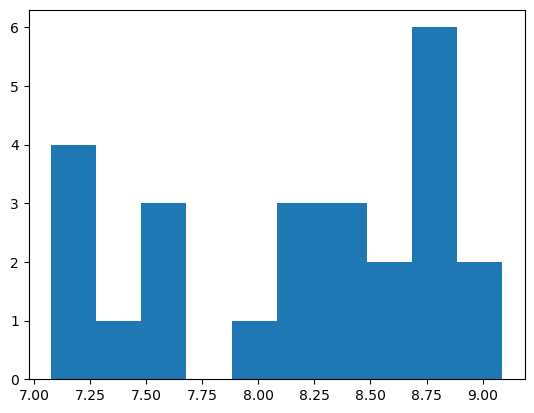

In [13]:
plt.hist(U.numpy());

## Нормальное распределение

In [14]:
N = Normal(torch.tensor([1.]), torch.tensor([2.3])).sample_n(25) 
N

tensor([[ 1.5156],
        [ 2.6762],
        [ 0.7213],
        [ 0.0935],
        [-0.2216],
        [-1.4826],
        [-1.9749],
        [-3.0485],
        [ 0.4789],
        [ 0.1924],
        [ 3.0711],
        [ 1.2992],
        [ 0.9345],
        [-0.2519],
        [ 2.1228],
        [ 0.5405],
        [ 1.9699],
        [-0.6560],
        [ 2.1414],
        [ 1.5679],
        [-2.4777],
        [-1.2887],
        [ 4.8002],
        [ 0.8698],
        [ 0.6202]])

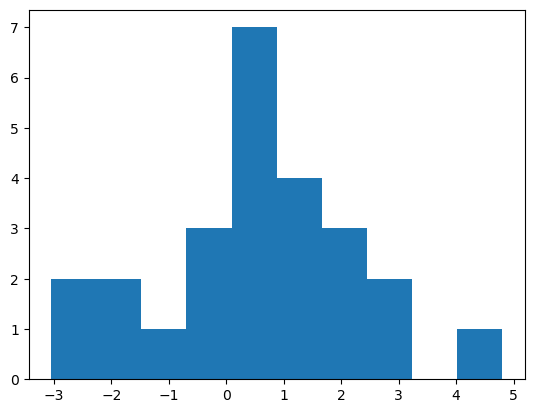

In [15]:
plt.hist(N.numpy());

### еще вариант...

In [16]:
empty_tensor = torch.empty(25)
empty_tensor.normal_().histogram()

torch.return_types.histogram(
hist=tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 2., 0., 0., 1., 0.,
        0., 0., 2., 0., 0., 0., 0., 1., 2., 2., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
bin_edges=tensor([-1.5552e+00, -1.5164e+00, -1.4775e+00, -1.4387e+00, -1.3999e+00,
        -1.3610e+00, -1.3222e+00, -1.2834e+00, -1.2445e+00, -1.2057e+00,
        -1.1669e+00, -1.1281e+00, -1.0892e+00, -1.0504e+00, -1.0116e+00,
        -9.7273e-01, -9.3390e-01, -8.9506e-01, -8.5623e-01, -8.1740e-01,
        -7.7857e-01, -7.3974e-01, -7.0091e-01, -6.6207e-01, -6.2324e-01,
        -5.8441e-01, -5.4558e-01, -5.0675e-01, -4.6792e-01, -4.2909e-01,
        -3.9025e-01, -3.5142e-01, -3.1259e-01, -2.7376e-01, -2.3493

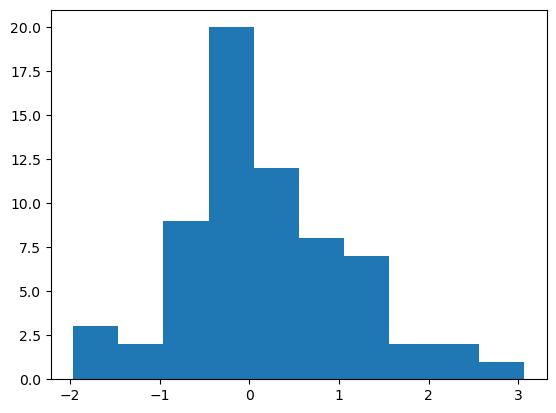

In [17]:
Norm = torch.empty(66).normal_()
plt.hist(Norm.numpy());

In [18]:
Norm.histc()

tensor([1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 1., 1., 1., 1., 0., 0., 2., 1., 1., 1., 0., 1., 2., 1., 1., 4.,
        0., 2., 5., 4., 0., 0., 1., 0., 1., 2., 2., 1., 2., 3., 0., 1., 0., 2.,
        0., 2., 0., 2., 1., 0., 0., 0., 2., 0., 2., 1., 1., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [19]:
Norm.histogram()

torch.return_types.histogram(
hist=tensor([1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 1., 1., 1., 1., 0., 0., 2., 1., 1., 1., 0., 1., 2., 1., 1., 4.,
        0., 2., 5., 4., 0., 0., 1., 0., 1., 2., 2., 1., 2., 3., 0., 1., 0., 2.,
        0., 2., 0., 2., 1., 0., 0., 0., 2., 0., 2., 1., 1., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
bin_edges=tensor([-1.9653e+00, -1.9149e+00, -1.8646e+00, -1.8143e+00, -1.7640e+00,
        -1.7136e+00, -1.6633e+00, -1.6130e+00, -1.5627e+00, -1.5123e+00,
        -1.4620e+00, -1.4117e+00, -1.3614e+00, -1.3110e+00, -1.2607e+00,
        -1.2104e+00, -1.1601e+00, -1.1097e+00, -1.0594e+00, -1.0091e+00,
        -9.5875e-01, -9.0842e-01, -8.5810e-01, -8.0777e-01, -7.5745e-01,
        -7.0712e-01, -6.5680e-01, -6.0647e-01, -5.5615e-01, -5.0582e-01,
        -4.5550e-01, -4.0517e-01, -3.5484e-01, -3.0452e-01, -2.5419

### равномерные распределения

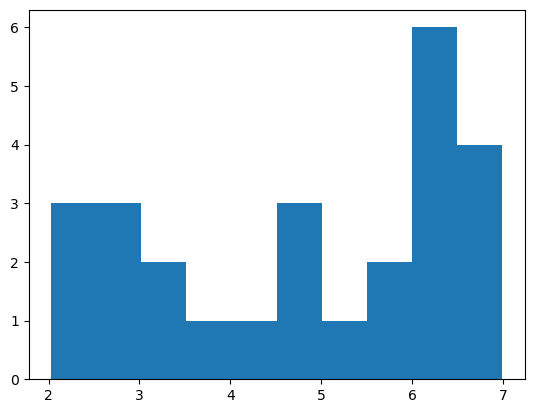

In [20]:
plt.hist(torch.empty(26).uniform_(2,7).numpy());

tensor([3., 1., 3., 2., 1., 5., 6., 5., 4., 2.])


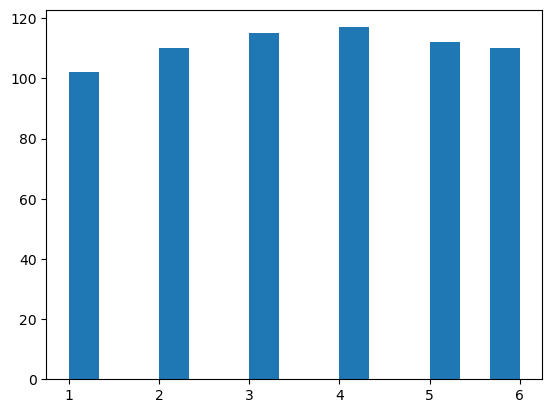

In [21]:
Rand = torch.empty(666).random_(1,7)
print (Rand[:10])
plt.hist(Rand.numpy(), bins=15);

## Передаем в тензор произвольное распределение

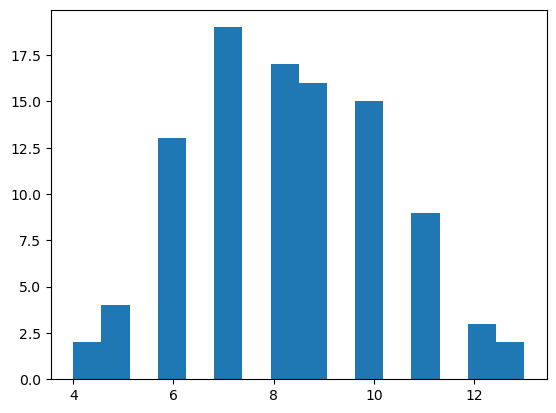

In [22]:
plt.hist(torch.tensor(sts.binom(20, .4).rvs(size=100)).numpy(), bins=16)  
plt.show()

## Строим кривые плотности распределения

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs
100 101


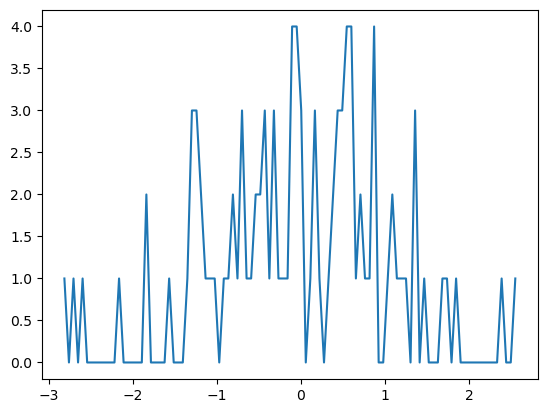

In [23]:
%time
h, be = torch.empty(100).normal_().histogram()  # 1000000
print (len(h), len(be))
plt.plot(be[:-1], h, )  
plt.show()

100 101


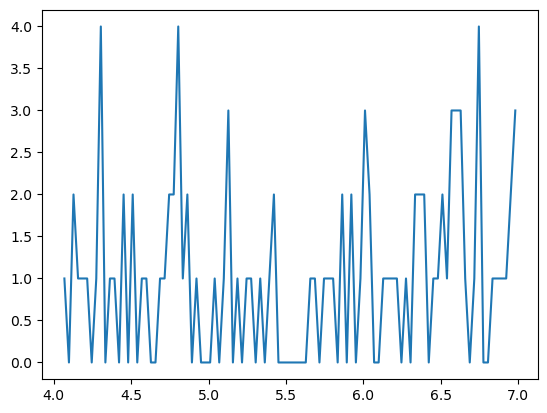

In [24]:
h, be = torch.empty(100).uniform_(4, 7).histogram() # 1000000
print (len(h), len(be))

plt.plot(be[1:], h, )  
plt.show()

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs


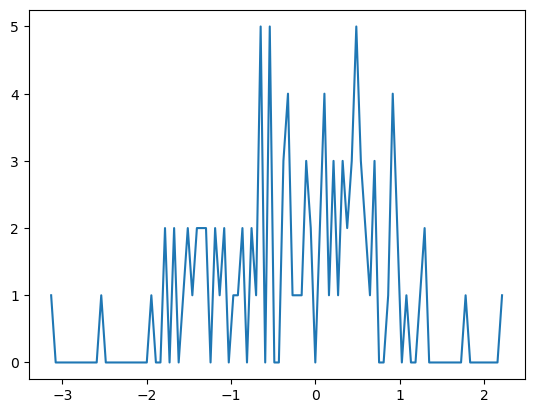

In [25]:
%time
h, be = torch.tensor(np.random.normal(size=100)).histogram()   # 1000000

plt.plot(be[:-1], h, )  
plt.show()

## Считаем доверительный интревал

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs


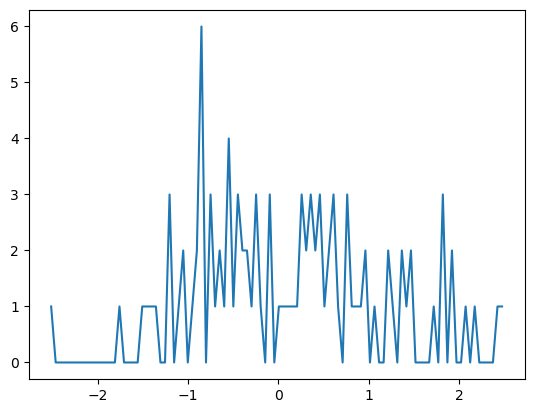

In [26]:
%time
example = torch.tensor(sts.norm.rvs(size=100))  # 1000000
h, be = example.histogram()   

plt.plot(be[:-1], h, )  
plt.show()

In [27]:
import statsmodels.stats.weightstats as ssw
print (u"\u03BC = {:.6}".format(str(example.mean().numpy())))
print (u"\u03C3 = {:.6}".format(str(example.std().numpy())))

ssw._zconfint_generic(example.mean().numpy(),  example.std().numpy()/np.sqrt(len(example)-1),\
                      alpha=0.95, alternative='two-sided')

μ = 0.1388
σ = 1.0270


(0.1323608667009329, 0.14530673910181724)